In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from math import sqrt

# Data Preprocessing

In [598]:
xls=pd.ExcelFile('Data for technical assessment.xlsx')

In [599]:
df1 = xls.parse('Dataset 1 - General')
df2 = xls.parse('Dataset 2 - Underwriting')

merge two dataframes

In [600]:
df_new = pd.merge(df1, df2, on = 'Unnamed: 0', how = 'left')

modify column names, remove redundant symbols

In [601]:
df_new.columns = df_new.columns.str.split('.').str[0]
df_new

,Unnamed: 0,NWP (£m),NWP (£m),NWP (£m),NWP (£m),NWP (£m),SCR (£m),SCR (£m),SCR (£m),SCR (£m),...,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio
0,NaN,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,...,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE
1,Firm 1,-13779.815629,0,0,0,0,1085.360139,0.0,0,0,...,0,56.813725,0,0,0,0,68.215239,0,0,0
2,Firm 2,28.178059,26.865049,25.064438,23.226445,21.718558,10.190314,10.113572,9.495235,8.146471,...,0.743265,0.963451,0.814588,0,0,0.945394,1.126744,0.939197,0,0
3,Firm 3,0,75.609681,70.578732,78.432782,85.73583,322.955115,363.782327,362.290859,394.295982,...,0,0,0,0,0,0,0,0,0,0
4,Firm 4,22344.199923,23963.910709,25760.390158,25512.748836,24996.021042,16573.6448,16332.7488,17103.616,17219.24608,...,0.14393,0.147519,0.092971,0.054781,-0.546237,0.848032,1.474778,1.727968,1.208823,-10.736084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,Firm 321,0,0,-1.011367,-6.599067,24.632234,0,0.258621,62.227588,51.830942,...,0.211938,0.256118,0.245704,0.236224,0.278674,0.978004,1.002691,0.97254,0.958443,0.81687
322,Firm 322,2092.156137,2084.124818,2022.212247,2103.048716,2029.697013,1711.220667,1641.309461,1329.471064,1399.098954,...,0.364543,0.372169,0.39877,0.420327,0.373813,0.885956,0.960993,0.913687,0.943246,0.995833
323,Firm 323,0,0,0,0,0,30.438558,15.232621,5.332069,1.55137,...,0,0,0,0,0,0,0,0,0,0
324,Firm 324,23.41538,22.650321,24.268465,25.811984,26.546638,32.096633,30.205948,29.517977,29.954935,...,0.427635,0.371681,0.357627,0.330893,0.302577,1.063136,1.006945,0.982816,0.994712,0.780065


check for missing values

In [602]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 86 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Unnamed: 0                                         325 non-null    object
 1   NWP (£m)                                           326 non-null    object
 2   NWP (£m)                                           326 non-null    object
 3   NWP (£m)                                           326 non-null    object
 4   NWP (£m)                                           326 non-null    object
 5   NWP (£m)                                           326 non-null    object
 6   SCR (£m)                                           326 non-null    object
 7   SCR (£m)                                           326 non-null    object
 8   SCR (£m)                                           326 non-null    object
 9   SCR (£m)             

- No null value
- There are 326 rows and 86 columns
- The columns have only one type of datatypes: object

Remove the first column. The numbers correspond to the companies in the same order, so we can use them interchangeably.

In [603]:
df_new = df_new.drop('Unnamed: 0',axis=1)
df_new.shape

(326, 85)

In [604]:
df_new

,NWP (£m),NWP (£m),NWP (£m),NWP (£m),NWP (£m),SCR (£m),SCR (£m),SCR (£m),SCR (£m),SCR (£m),...,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio
0,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,...,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE
1,-13779.815629,0,0,0,0,1085.360139,0.0,0,0,0,...,0,56.813725,0,0,0,0,68.215239,0,0,0
2,28.178059,26.865049,25.064438,23.226445,21.718558,10.190314,10.113572,9.495235,8.146471,7.324577,...,0.743265,0.963451,0.814588,0,0,0.945394,1.126744,0.939197,0,0
3,0,75.609681,70.578732,78.432782,85.73583,322.955115,363.782327,362.290859,394.295982,400.69954,...,0,0,0,0,0,0,0,0,0,0
4,22344.199923,23963.910709,25760.390158,25512.748836,24996.021042,16573.6448,16332.7488,17103.616,17219.24608,19600.262144,...,0.14393,0.147519,0.092971,0.054781,-0.546237,0.848032,1.474778,1.727968,1.208823,-10.736084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0,0,-1.011367,-6.599067,24.632234,0,0.258621,62.227588,51.830942,167.547783,...,0.211938,0.256118,0.245704,0.236224,0.278674,0.978004,1.002691,0.97254,0.958443,0.81687
322,2092.156137,2084.124818,2022.212247,2103.048716,2029.697013,1711.220667,1641.309461,1329.471064,1399.098954,1395.278396,...,0.364543,0.372169,0.39877,0.420327,0.373813,0.885956,0.960993,0.913687,0.943246,0.995833
323,0,0,0,0,0,30.438558,15.232621,5.332069,1.55137,1.48681,...,0,0,0,0,0,0,0,0,0,0
324,23.41538,22.650321,24.268465,25.811984,26.546638,32.096633,30.205948,29.517977,29.954935,30.191048,...,0.427635,0.371681,0.357627,0.330893,0.302577,1.063136,1.006945,0.982816,0.994712,0.780065


# Exploratory Data Analysis

In [605]:
df_new['SCR coverage ratio']

,SCR coverage ratio,SCR coverage ratio,SCR coverage ratio,SCR coverage ratio,SCR coverage ratio
0,2016YE,2017YE,2018YE,2019YE,2020YE
1,1.979865,481792000,0,0,0
2,3.15743,3.871771,5.137122,6.813341,3.900918
3,1.741407,1.480455,1.505583,1.462225,1.298726
4,1.38737,1.386057,1.424473,1.50316,1.414507
...,...,...,...,...,...
321,0,14.323929,1.715355,4.502631,1.697523
322,1.186379,1.351171,1.486424,1.425819,1.381756
323,1.276845,3.905706,11.584196,38.208765,2.660207
324,1.565118,1.498564,1.649258,1.771084,1.707757


In [606]:
# Remove suffix and convert numeric type
df_new.iloc[0] = df_new.iloc[0].str.replace('YE', '')
df_new = df_new.astype(float)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 85 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   NWP (£m)                                           326 non-null    float64
 1   NWP (£m)                                           326 non-null    float64
 2   NWP (£m)                                           326 non-null    float64
 3   NWP (£m)                                           326 non-null    float64
 4   NWP (£m)                                           326 non-null    float64
 5   SCR (£m)                                           326 non-null    float64
 6   SCR (£m)                                           326 non-null    float64
 7   SCR (£m)                                           326 non-null    float64
 8   SCR (£m)                                           326 non-null    float64
 9   SCR (£m)  

- No null value

- All values have been converted to float

In [607]:
#Need to be converted to numeric type first
#df_new = df_new.apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0).astype(int)
#year = df_new.iloc[0]
#df_new = df_new.drop(0, axis=0)
#df_new = df_new.apply(pd.to_numeric)

In [608]:
df_new['SCR coverage ratio'].describe()

,SCR coverage ratio,SCR coverage ratio,SCR coverage ratio,SCR coverage ratio,SCR coverage ratio
count,3.260000e+02,3.260000e+02,3.260000e+02,326.000000,326.000000
mean,1.283618e+04,5.912128e+06,1.243536e+04,537.575346,518.834081
std,2.315954e+05,6.519430e+07,2.138036e+05,9524.905496,9215.953537
min,-1.974450e+00,-1.973652e+00,-5.515428e-01,-0.669013,-1.066521
25%,1.279429e+00,1.304347e+00,1.269327e+00,1.178179,0.000000
50%,1.664381e+00,1.760321e+00,1.704385e+00,1.711677,1.572448
75%,2.784034e+00,3.215403e+00,2.875804e+00,2.719971,2.399090
max,4.181573e+06,9.635840e+08,3.856018e+06,171974.690816,166394.575872


- Take the data of 2020 as an example
- The average SCR coverage ratio is 518.834081
- The Maximum SCR coverage ratio is 166394.000000 and Minimum -1.000000
- It can be seen that from 2016 to 2020, the mean and standard deviation showed a downward trend

The year in the first row fails whether it is converted to int or using round to retain the integer part. Finally, it is converted to str and then splits the integer part.

In [609]:
df_new.loc[0] = df_new.loc[0].astype(str).str.split('.').str[0]

Modify column name

In [611]:
year = df_new.iloc[0] # name the first row as year
columns = df_new.columns[0:] # Column name slicing
#Use zip to package columns and years correspondingly, and then use f-string formatting to splice new column names.
new_columns = [f"{c}_{y}" for c, y in zip(columns, year)]
df_new.columns = new_columns
df_new = df_new.iloc[1:] #remove the first row

Select the data in 2020 to create a correlation coefficient matrix and heatmap

In [627]:
#Select the data in 2020 to form a new DataFrame
df_2020 = df_new.filter(like='2020')

Text(154.60937499999997, 0.5, 'Features')

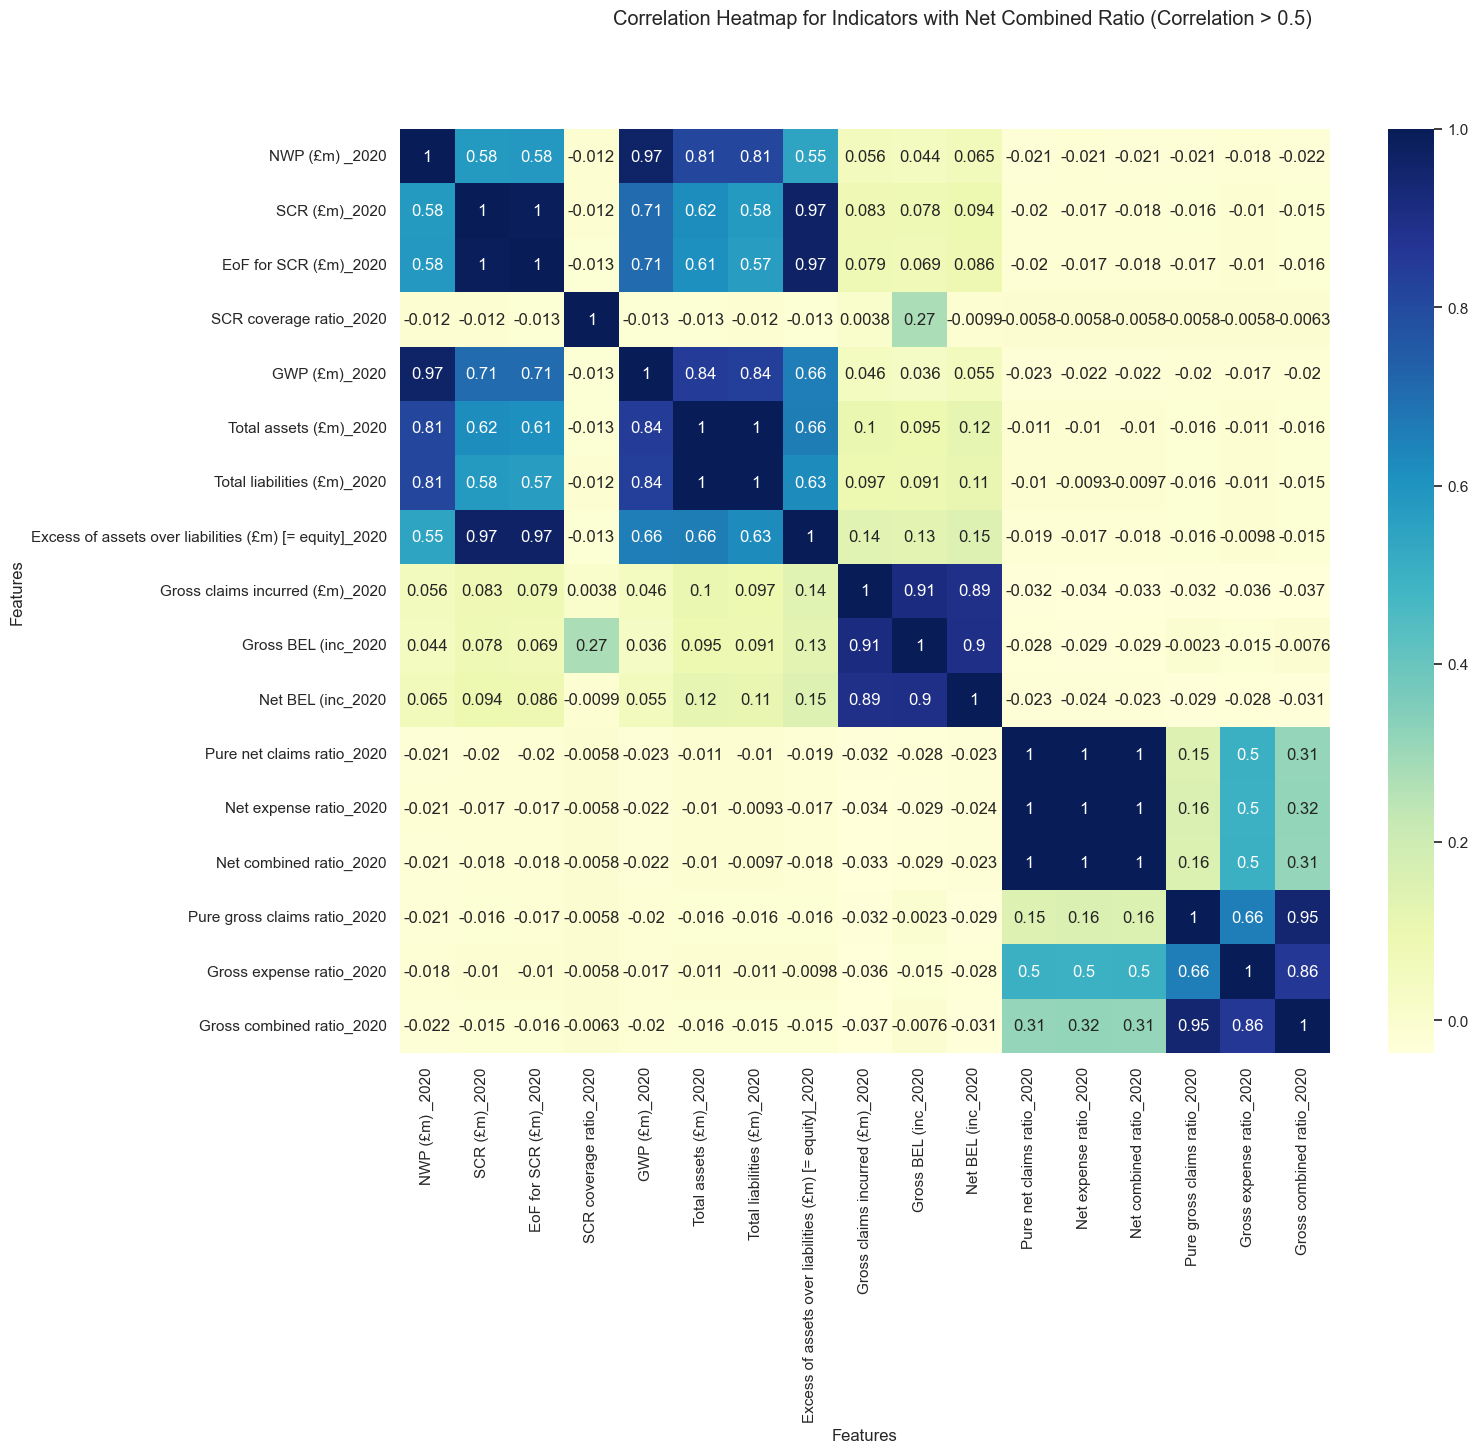

In [653]:
corr_mat = df_2020.corr()

sns.set(font_scale = 1)
plt.figure(figsize = (15,12))

#top_corr = corr_mat.index[abs(corr_mat["Net combined ratio_2020"])>0.5]
g = sns.heatmap(corr_mat,annot=True,cmap="YlGnBu")
plt.suptitle("Correlation Heatmap for Indicators with Net Combined Ratio (Correlation > 0.5)")
plt.xlabel("Features")
plt.ylabel("Features")

In [662]:
corr_mat.to_excel('corr_mat.xlsx', index=True)

Based on the provided correlation matrix, I identified the following pairs of strongly correlated indicators and chose a representative indicator for each pair: 

- SCR and EoF for SCR with a correlation coefficient of 0.9952, indicating a very strong positive correlation. Both are indicators of the company’s capital strength and risk resistance. I chose SCR as the representative indicator.

- Total assets and Total liabilities with a correlation coefficient of 0.9988, both are components of the balance sheet, and it is reasonable that they have a very strong correlation. I chose Total assets as the representative indicator.

- Net BEL and Gross BEL with a correlation coefficient of 0.8956, both reflect the company’s Loss Reserve level and quality. I chose Net BEL as the representative indicator. Pure net claims ratio and Net expense ratio with a correlation coefficient of 0.9966, reflecting the profitability of the company’s core business. I chose Net combined ratio as the representative indicator.

In summary, SCR, Total assets, Net BEL and Net combined ratio are representative indicators that can reflect the company’s overall strength and profitability quality from multiple dimensions.

Particularly, for Net combined ratio, the higher the ratio, the smaller the profit margin of the business. Therefore, companies with high Net combined ratio can be identified as poorly operated, high-risk companies that need to be paid attention to.


Outlier Detection

In [663]:
from scipy import stats

In [666]:
Q_SCR_1 = df_new['SCR (£m)_2020'].quantile(0.25)
Q_SCR_3 = df_new['SCR (£m)_2020'].quantile(0.75)
IQR_SCR = Q_SCR_3 - Q_SCR_1

In [667]:
upper_SCR = Q_SCR_3 + 1.5*IQR_SCR
lower_SCR = Q_SCR_1 - 1.5*IQR_SCR

In [672]:
outliers_SCR = df_new[(df_new['SCR (£m)_2020'] > upper_SCR) | (df_new['SCR (£m)_2020'] < lower_SCR)]

In [674]:
print(upper_SCR, lower_SCR)

197.89778565793614 -118.7386713947617


In [675]:
outliers_SCR

,NWP (£m) _2016,NWP (£m) _2017,NWP (£m) _2018,NWP (£m) _2019,NWP (£m) _2020,SCR (£m)_2016,SCR (£m)_2017,SCR (£m)_2018,SCR (£m)_2019,SCR (£m)_2020,...,Gross expense ratio_2016,Gross expense ratio_2017,Gross expense ratio_2018,Gross expense ratio_2019,Gross expense ratio_2020,Gross combined ratio_2016,Gross combined ratio_2017,Gross combined ratio_2018,Gross combined ratio_2019,Gross combined ratio_2020
3,0.0,75.609681,70.578732,78.432782,85.73583,322.955115,363.782327,362.290859,394.295982,400.69954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22344.199923,23963.910709,25760.390158,25512.748836,24996.021042,16573.6448,16332.7488,17103.616,17219.24608,19600.262144,...,0.14393,0.147519,0.092971,0.054781,-0.546237,0.848032,1.474778,1.727968,1.208823,-10.736084
6,1826.798004,3040.633852,1634.218908,3082.590166,3041.876078,2717.768106,2791.422212,2804.596443,3066.367918,3281.203179,...,0.236662,0.242863,0.232953,0.198427,0.155372,1.2622,0.840078,0.922944,0.769213,0.752116
7,5855.172823,11688.570412,9414.976495,10975.189662,8359.905292,3342.985564,4042.827472,4313.755092,4106.815583,4497.938625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1273.949683,10516.21029,10087.572411,8921.879529,7893.06412,3628.700545,3127.302933,2386.907275,2446.49315,2880.316429,...,0.361915,0.350044,0.302983,0.286821,0.25142,1.027545,1.314803,1.013524,0.900309,0.922348
19,0.0,0.0,0.0,1088.97984,1143.960077,0.0,0.0,0.523332,1316.642441,1316.647055,...,0.391628,0.376025,0.351472,0.352199,0.341397,0.850664,1.208196,0.981843,1.276871,0.927377
26,45309.838702,7239.360829,7616.755563,10450.175547,10489.248083,2459.214889,2615.457124,2647.668242,2719.948271,2369.903562,...,0.325036,0.285316,0.305277,0.308258,0.281676,0.829502,1.017688,0.879597,0.941402,0.94869
30,2480.383308,3530.005739,6861.810012,6875.660753,4944.576605,1842.616448,2006.22813,2257.637446,2846.787579,4105.895927,...,0.404635,0.256035,0.484778,0.0,0.0,0.229882,15.666874,9.307407,0.0,0.0
34,6817.399238,5780.78114,4497.979967,-181.612136,8145.61732,7269.521977,7076.519747,6783.113294,6328.08622,6443.117305,...,0.0,1.712496,0.650857,0.502555,0.796069,0.0,2.819749,1.235272,1.043209,1.635144
40,1272.368235,1230.025258,1077.289613,228.528865,471.014008,535.026963,398.504744,374.60693,350.109503,361.037598,...,0.606057,0.445448,0.336916,0.372985,0.351976,1.32484,1.141454,0.972304,1.176477,1.243479


Generally, a higher SCR indicates greater safety for the company. However, if the SCR is excessively high, it could imply an excess of capital or lower risk, potentially impacting the company's return on investment and competitiveness.

In [680]:
Q_TA_1 = df_new['Total assets (£m)_2020'].quantile(0.25)
Q_TA_3 = df_new['Total assets (£m)_2020'].quantile(0.75)
IQR_TA = Q_TA_3 - Q_TA_1

upper_TA = Q_TA_3 + 1.5*IQR_TA
lower_TA = Q_TA_1 - 1.5*IQR_TA

outliers_TA = df_new[(df_new['Total assets (£m)_2020'] > upper_TA) | (df_new['Total assets (£m)_2020'] < lower_TA)]
print(upper_TA, lower_TA)

1695.7938555506767 -1017.4763133304059


In [682]:
outliers_TA['Total assets (£m)_2020']

3        1754.979053
4       94065.081033
6       64743.030244
7      110371.664099
10     142144.987135
19       6542.888525
22       2414.408104
23       9418.619511
25      32226.173617
26      66455.366857
30      71582.295825
34     185108.328631
35       5039.975691
40       2858.710359
47       2513.893579
51      17526.151708
53       8123.295924
73      89412.166323
76      18362.195761
89       6450.659051
104     14833.417569
105    190431.207543
107       7146.27258
114      2862.499579
120     29092.224336
134       16471.1239
136      3462.466706
141      4234.238198
142      2718.285013
151     82397.812536
156      5778.587805
165      2172.640092
175       4954.83232
182      3190.768547
188      34669.27426
189      3586.330915
199     83298.942335
203      4260.020765
208     35549.689119
210    332875.903638
234     14259.493757
247     73874.502986
266      2025.656982
276     34751.530844
280      1740.492254
281      3843.680865
284     13016.273416
295     18395

In general, the higher the total assets, the stronger the company. However, if total assets are excessively high, it could also indicate a low asset utilization rate or an inefficient asset structure, potentially affecting the company's profitability and efficiency.

In [698]:
Q_BEL_1 = df_new['Net BEL (inc_2020'].quantile(0.25)
Q_BEL_3 = df_new['Net BEL (inc_2020'].quantile(0.75)
IQR_BEL = Q_BEL_3 - Q_BEL_1

upper_BEL = Q_BEL_3 + 1.5*IQR_BEL
lower_BEL = Q_BEL_1 - 1.5*IQR_BEL

outliers_BEL = df_new[(df_new['Net BEL (inc_2020'] > upper_BEL) | (df_new['Net BEL (inc_2020'] < lower_BEL)]
print(upper_BEL, lower_BEL)

289.4626303947911 -173.67757823687467


In [700]:
outliers_BEL['Net BEL (inc_2020']

5       389.345395
6       360.014346
14      489.163149
17      4894.31612
18      632.740759
19      478.515455
22      2678.95105
26      556.032292
37      893.879211
49      498.228349
52     3701.772642
56      873.572667
60       303.29792
74     2040.132279
81       991.16177
105    3280.396878
110       713.2697
112    1700.856224
116     581.239696
118     356.057243
131     559.249679
135     408.473309
158    1889.664593
160     660.896695
163     345.413084
185     332.587592
186     339.339593
189     289.564292
196     524.392388
198     748.112929
210     889.852187
225     707.025745
230     304.116164
234     591.262891
238      332.63782
239     344.049955
243     297.962566
260     472.297449
261    1254.409245
272     584.038231
280    1432.305121
283    3037.791384
286    2141.085202
287     477.327719
297     407.621089
300     359.573631
304     3023.35699
305     912.098013
317     378.487842
Name: Net BEL (inc_2020, dtype: object

Net liabilities reserve is an indicator reflecting the level and quality of a company's liabilities. Generally, the higher the net liabilities reserve, the greater the debt pressure on the company.

In [701]:
Q_CR_1 = df_new['Net combined ratio_2020'].quantile(0.25)
Q_CR_3 = df_new['Net combined ratio_2020'].quantile(0.75)
IQR_CR = Q_CR_3 - Q_CR_1

upper_CR = Q_CR_3 + 1.5*IQR_CR
lower_CR = Q_CR_1 - 1.5*IQR_CR

outliers_CR = df_new[(df_new['Net combined ratio_2020'] > upper_CR) | (df_new['Net combined ratio_2020'] < lower_CR)]
print(upper_CR, lower_CR)

2.4703610683232546 -1.4822166409939528


In [703]:
outliers_CR['Net combined ratio_2020']

4         -3.40847
39        5.772639
72       49.511434
88        4.061417
146       5.445206
166     989.155405
178       21.00369
203       3.117125
228    1076.158703
251      -9.490844
284     906.307872
308       -1.60694
Name: Net combined ratio_2020, dtype: object

The net combined ratio is the ratio of an insurance company's income to the sum of claims and expenses. If the net combined ratio is above 100%, it indicates that the income is insufficient to cover claims and expenses, resulting in a core business loss. Conversely, if the net combined ratio is below 100%, it signifies that income exceeds claims and expenses, leading to a profit in the core business. Therefore, lower outliers suggest a larger profit margin in a company's core business. For companies with higher outliers, their core business profit margin is smaller, indicating a potential loss in the core business.

In [712]:
df_new = df_new.astype(float)

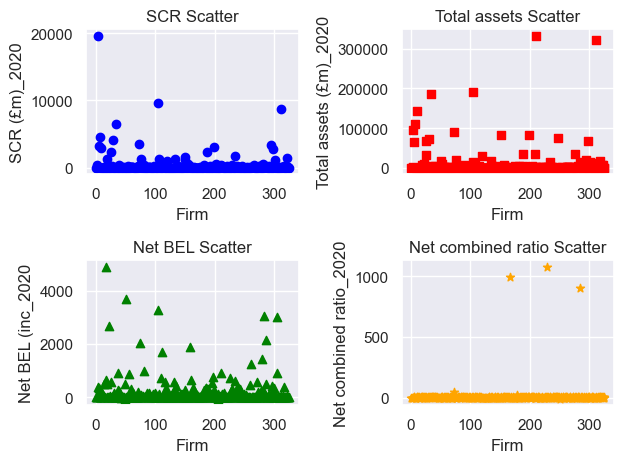

In [713]:
# Define the x-axis and y-axis data for the business
x = df_new.index
y1 = df_new['SCR (£m)_2020']
y2 = df_new['Total assets (£m)_2020']
y3 = df_new['Net BEL (inc_2020']
y4 = df_new['Net combined ratio_2020']

# Create a large canvas with a specified number of rows and columns, set to 2
fig, axs = plt.subplots(2, 2)

# Plot a scatter plot on the first subplot, where the x-axis is the index, and the y-axis is SCR (£m)_2020
axs[0, 0].scatter(x, y1, c='blue', marker='o')
axs[0, 0].set_title('SCR Scatter')
axs[0, 0].set_xlabel('Firm')
axs[0, 0].set_ylabel('SCR (£m)_2020')

# Plot a scatter plot on the second subplot, where the x-axis is the index, and the y-axis is Total assets (£m)_2020
axs[0, 1].scatter(x, y2, c='red', marker='s')
axs[0, 1].set_title('Total assets Scatter')
axs[0, 1].set_xlabel('Firm')
axs[0, 1].set_ylabel('Total assets (£m)_2020')

# Plot a scatter plot on the third subplot, where the x-axis is the index, and the y-axis is Net BEL (inc_2020)
axs[1, 0].scatter(x, y3, c='green', marker='^')
axs[1, 0].set_title('Net BEL Scatter')
axs[1, 0].set_xlabel('Firm')
axs[1, 0].set_ylabel('Net BEL (inc_2020')

# Plot a scatter plot on the fourth subplot, where the x-axis is the index, and the y-axis is Net combined ratio_2020
axs[1, 1].scatter(x, y4, c='orange', marker='*')
axs[1, 1].set_title('Net combined ratio Scatter')
axs[1, 1].set_xlabel('Firm')
axs[1, 1].set_ylabel('Net combined ratio_2020')

# Adjust the spacing between subplots
fig.tight_layout()

plt.show()

In [746]:
focus_firm = df_new[df_new['Net combined ratio_2020'] > 100]
focus_firm

,NWP (£m) _2016,NWP (£m) _2017,NWP (£m) _2018,NWP (£m) _2019,NWP (£m) _2020,SCR (£m)_2016,SCR (£m)_2017,SCR (£m)_2018,SCR (£m)_2019,SCR (£m)_2020,...,Gross expense ratio_2016,Gross expense ratio_2017,Gross expense ratio_2018,Gross expense ratio_2019,Gross expense ratio_2020,Gross combined ratio_2016,Gross combined ratio_2017,Gross combined ratio_2018,Gross combined ratio_2019,Gross combined ratio_2020
166,0.000000,6.418642,26.381434,3.983785,4.362310,17.432085,17.512048,22.383634,11.353272,9.233553,...,175.471605,-2.110913,39.502628,-217.185000,469.454795,197.468076,-2.148517,80.35226,-431.983972,559.666587
228,6.113332,7.499978,8.565410,10.200635,10.989747,12.219932,12.466519,13.793478,17.668175,21.168580,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
284,67.930745,77.092904,71.863043,67.258473,63.785768,281.553463,277.963078,229.208070,205.937540,191.707533,...,0.000000,0.000000,0.000000,365.508694,488.747636,0.000000,0.000000,0.00000,548.763528,912.288436


In [745]:
focus_firm = df_new[df_new['Net combined ratio_2020'] > 100]

# Define the criteria for high risk   
conditions = [
    (df_new['SCR coverage ratio_2020'] < 100),
    (df_new['Net expense ratio_2020'] > 60),
    (df_new['Net combined ratio_2020'] < 95)
]

risk_df = focus_firm[conditions[0] | conditions[1] | conditions[2]][['SCR coverage ratio_2020',
                                                                     'Net expense ratio_2020', 
                                                                     'Net combined ratio_2020']]

print(risk_df)

     SCR coverage ratio_2020  Net expense ratio_2020  Net combined ratio_2020
166                 2.196276              485.389785               989.155405
228                 1.465498              557.477363              1076.158703
284                 1.800584              488.747636               906.307872


/var/folders/dd/c3_3kbtn70z7f596kppyl8r80000gn/T/ipykernel_47177/163623881.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  risk_df = focus_firm[conditions[0] | conditions[1] | conditions[2]][['SCR coverage ratio_2020',


we can see that the focus firms are the same as the ones we filtered out

In [747]:
from mpl_toolkits.mplot3d import Axes3D

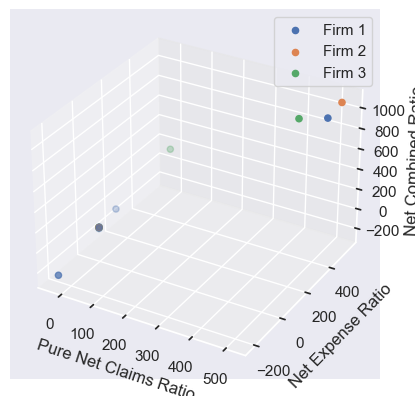

In [756]:
# Extract data
net_claim_ratio = focus_firm[['Pure net claims ratio_2016', 'Pure net claims ratio_2017', 
                             'Pure net claims ratio_2018', 'Pure net claims ratio_2019', 
                             'Pure net claims ratio_2020']]
net_expense_ratio = focus_firm[['Net expense ratio_2016', 'Net expense ratio_2017', 
                               'Net expense ratio_2018', 'Net expense ratio_2019', 
                              'Net expense ratio_2020']]
net_combined_ratio = focus_firm[['Net combined ratio_2016', 'Net combined ratio_2017',
                                'Net combined ratio_2018', 'Net combined ratio_2019',
                                'Net combined ratio_2020']]

# Create a three-dimensional plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot scatter chart
for i in range(len(focus_firm)):
    ax.scatter(net_claim_ratio.iloc[i], net_expense_ratio.iloc[i], net_combined_ratio.iloc[i], 
               marker='o', label=f'Firm {i + 1}')

# Set axis labels
ax.set_xlabel('Pure Net Claims Ratio')
ax.set_ylabel('Net Expense Ratio')
ax.set_zlabel('Net Combined Ratio')

ax.legend()


plt.show()

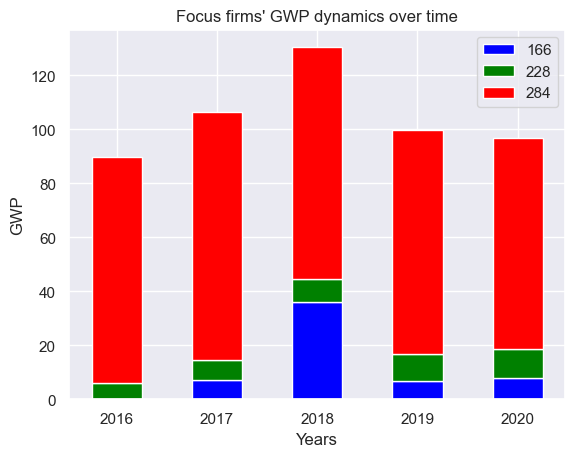

In [772]:
# Convert the data into a two-dimensional array, transpose it, and retain only the col
GWP = focus_firms.filter(regex='GWP').values.T umns related to GWP
companies = focus_firms.index # Get the company names
years = [col.split('_')[1] for col in focus_firms.filter(regex='GWP').columns] # Extracting the year from column names

# Setting the width and position of the bar chart
width = 0.5
x = np.arange(len(years))

# Create a stacked bar chart
colors = ['blue', 'green', 'red'] 
bottom = np.zeros(len(years)) # Set the bottom height to zero
for i in range(len(companies)):
    plt.bar(x, GWP[:, i], width, label=companies[i], color=colors[i], bottom=bottom)
    bottom += GWP[:, i] # update the bottom height

# Set the labels for the x-axis and y-axis
plt.xlabel('Years')
plt.ylabel('GWP')

# set the x-axis ticks and labels
plt.xticks(x, years)

# set the title and legend
plt.title("Focus firms' GWP dynamics over time")
plt.legend()


plt.show()

- The GWP of firm 166 increased rapidly from 2016 to 2018, which originally indicated business expansion and revenue growth. But then the GWP dropped significantly, reflecting the shrinkage of the business scale, which might be due to the changes in the market environment or the company’s strategic adjustment. Overall, this kind of ups and downs will eventually affect the company’s profitability and development quality.


- The GWP of firm 228 showed a stable growth trend and maintained at a certain level, which reflected the company’s good and controllable business expansion. The stable GWP laid the foundation for the subsequent revenue growth.


- The GWP of firm 284 was much higher than the other two, but it declined to some extent in 2020. This might imply that the company faced the changes in the market environment or the competitive situation.

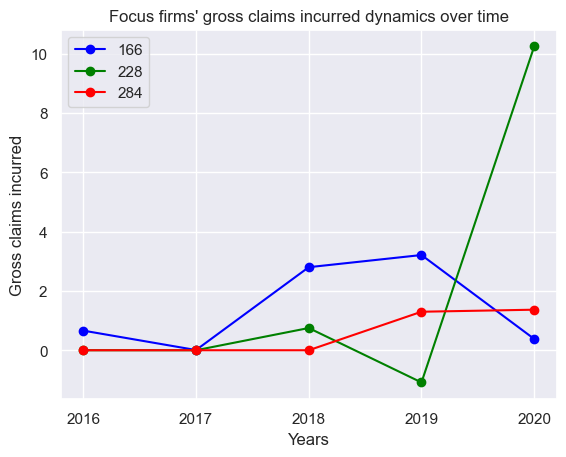

In [779]:
# Convert the data to a two-dimensional array, and transpose it, keeping only the columns related 
GCI = focus_firms.filter(regex='Gross claims incurred').values.T to total claims incurred
companies = focus_firms.index # Get the company names
years = [col.split('_')[1] for col in focus_firms.filter(regex='Gross claims incurred').columns]

# Set the position of the x-axis
x = np.arange(len(years))

# plot line chart
colors = ['blue', 'green', 'red'] 
for i in range(len(companies)):
    plt.plot(x, GCI[:, i], label=companies[i], color=colors[i], marker='o')

# Set the labels for the x-axis and y-axis
plt.xlabel('Years')
plt.ylabel('Gross claims incurred')

# set the x-axis ticks and labels
plt.xticks(x, years)

# set the title and legend
plt.title("Focus firms' gross claims incurred dynamics over time")
plt.legend()

plt.show()

- The gross claims of company 166 fluctuated greatly, falling first and then rising. Especially in 2018-2019, the claims rose rapidly, increasing the pressure on the company’s cost expenditure. But in 2020, the claims fell back, which was a positive sign. Overall, this kind of ups and downs increased the company’s operational risk.

- The gross claims of company 228 also had large fluctuations. Although the claims rose in 2020, the absolute value was still low. This reflected that the company’s business scale was small and the retained risk was controllable. But the fluctuations also added some uncertainty.


- The gross claims of company 284 were zero in the first three years, and slightly increased but remained stable in 2019-2020. This showed that the company’s business was robust, high-quality, and the payment risk was controllable. This was a relatively positive signal.

In [813]:
gross_bel = focus_firms.filter(regex='Gross BEL').values
net_bel = focus_firms.filter(regex='Net BEL').values

# To subtract gross bel and net bel according to the corresponding year, and get the diff variable
diff = gross_bel - net_bel

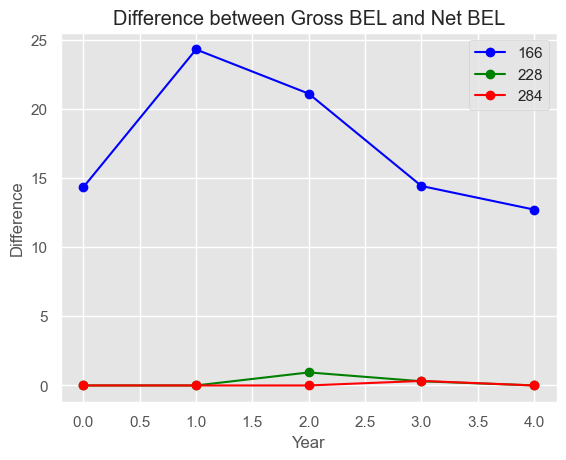

In [814]:
companies = focus_firms.index
years = [col.split('_')[1] for col in focus_firms.filter(regex='Gross BEL').columns]
plt.style.use('ggplot')

x = np.arange(len(years)) 
colors = ['blue', 'green', 'red']
for i in range(len(companies)):
    plt.plot(x, diff[i], label=companies[i], color=colors[i], marker='o')

plt.title("Difference between Gross BEL and Net BEL")
plt.xlabel('Year')
plt.ylabel('Difference')
plt.legend()
plt.savefig('diff_BEL.png')
plt.show()    

- Firm 166’s difference increased from 2016 to 2017, indicating that its reinsurance arrangement effectively reduced its net liabilities and improved its financial situation in that year. However, from 2018 onwards, its difference decreased year by year, dropping to 12.711466 in 2020, indicating that its reinsurance arrangement gradually worsened in these years, increasing its net liabilities and affecting its financial situation.


- Firm 228’s difference was zero between 2016 and 2017, indicating that it did not conduct reinsurance or that its reinsurance arrangement had no effect, and its net liabilities were equal to its gross liabilities. Between 2018 and 2020, its difference increased slightly, but it was still very small, indicating that its reinsurance arrangement had some effect in this period, but it was still not significant, and its net liabilities were still close to its gross liabilities. Company 228 needs to evaluate whether its reinsurance arrangement is reasonable, whether it can effectively diversify risks, reduce costs, and increase benefits.

- Firm 284’s difference fluctuated greatly between 2016 and 2020, indicating that its reinsurance arrangement was unstable in this period, sometimes good and sometimes bad, and the gap between its net liabilities and its gross liabilities varied greatly. Company 284 needs to monitor the effect of its reinsurance arrangement, whether it can maintain a certain stability, avoid excessive fluctuations, and affect its financial situation.

In [817]:
df10 = pd.DataFrame(diff, columns=['2016', '2017', '2018', '2019', '2020'], index=['166', '228', '284'])

In [818]:
df10

,2016,2017,2018,2019,2020
166,14.329006,24.290184,21.094455,14.417360,12.711466
228,0.000000,0.000000,0.941216,0.302574,0.001192
284,0.000000,0.000000,0.000000,0.327468,0.000000
